# 카이제곱 검정

## 적합도 검정

In [5]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# Seaborn의 tips 데이터셋 로드
tips = sns.load_dataset('tips')

# 'day' 변수의 관측 빈도 계산
observed_frequencies = tips['day'].value_counts().sort_index()
observed_frequencies

,count
day,
Thur,62
Fri,19
Sat,87
Sun,76


In [7]:
len(tips) / len(observed_frequencies)

61.0

In [8]:
# 기대되는 분포가 균등 분포라고 가정 (즉, 각 요일에 동일한 빈도 기대)
expected_frequencies = [len(tips) / len(observed_frequencies)] * len(observed_frequencies)

print(expected_frequencies)

[61.0, 61.0, 61.0, 61.0]


In [9]:
# 적합도 검정 수행
chi2_stat, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("귀무가설 기각: 관측된 데이터는 기대되는 균등 분포와 다릅니다.")
else:
    print("귀무가설 채택: 관측된 데이터는 기대되는 균등 분포와 일치합니다.")

Chi-square Statistic: 43.70491803278689
P-value: 1.7434891890557614e-09
귀무가설 기각: 관측된 데이터는 기대되는 균등 분포와 다릅니다.


## 독립성 검정

In [11]:
# 성별(sex)과 흡연여부(smoker) 간의 교차표 생성
contingency_table = pd.crosstab(tips['sex'], tips['smoker'])
contingency_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [12]:
# 독립성 검정 수행
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

if p_value < 0.05:
    print("귀무가설 기각: 성별과 흡연여부 간에는 연관성이 있습니다.")
else:
    print("귀무가설 채택: 성별과 흡연여부 간에는 연관성이 없습니다.")

Chi-square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
[[59.84016393 97.15983607]
 [33.15983607 53.84016393]]
귀무가설 채택: 성별과 흡연여부 간에는 연관성이 없습니다.


# 회귀분석

## 데이터 불러오기
- Google Drive에서 데이터를 불러오는 코드

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## iris 데이터셋

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

iris = sns.load_dataset("iris")
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


## 공분산 구하기

In [14]:
df = iris.loc[:9, ['sepal_width', 'petal_length']]
sepal_w_mean = df['sepal_width'].mean()
petal_l_mean = df['petal_length'].mean()
sepal_w_mean, petal_l_mean

(3.31, 1.45)

In [16]:
df.cov(ddof = 0) # 1은 N-1

,sepal_width,petal_length
sepal_width,0.0849,0.0155
petal_length,0.0155,0.0105


In [21]:
df['sepal_diff'] = df['sepal_width'] - sepal_w_mean
df['petal_diff'] = df['petal_length'] - petal_l_mean
df['multiple'] = df['sepal_diff'] * df['petal_diff']
print("편차의 합:", df['multiple'].sum())
print("공분산 :", df['multiple'].sum()/(len(df)))

편차의 합: 0.15499999999999994
공분산 : 0.015499999999999995


In [22]:
iris.iloc[:, :4].cov(ddof=0)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.681122,-0.042151,1.265820,0.512829
sepal_width,-0.042151,0.188713,-0.327459,-0.120828
petal_length,1.265820,-0.327459,3.095503,1.286972
petal_width,0.512829,-0.120828,1.286972,0.577133


## 상관계수 구하기

In [23]:
df = iris.loc[:9, ['sepal_width', 'petal_length']]
sepal_w_mean = df['sepal_width'].mean()
petal_l_mean = df['petal_length'].mean()
sepal_w_mean, petal_l_mean

(3.31, 1.45)

In [28]:
iris.iloc[:, :4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [24]:
df.corr()

,sepal_width,petal_length
sepal_width,1.000000,0.519138
petal_length,0.519138,1.000000


In [25]:
df['sepal_diff'] = df['sepal_width'] - sepal_w_mean
df['petal_diff'] = df['petal_length'] - petal_l_mean
df['multiple'] = df['sepal_diff'] * df['petal_diff']
df['sepal_squared'] = df['sepal_diff'] ** 2
df['petal_squared'] = df['petal_diff'] ** 2

cov_value = df['multiple'].sum()/(len(df))
sepal_squared_std = np.sqrt(np.mean(df['sepal_squared']))
petal_squared_std = np.sqrt(np.mean(df['petal_squared']))
print("편차의 합:", df['multiple'].sum())
print("공분산 :", cov_value)
print("sepal_squared 표준편차:", sepal_squared_std)
print("petal_squared 표준편차:", petal_squared_std)
print("상관계수:", cov_value / (sepal_squared_std * petal_squared_std))

편차의 합: 0.15499999999999994
공분산 : 0.015499999999999995
sepal_squared 표준편차: 0.2913760456866693
petal_squared 표준편차: 0.10246950765959598
상관계수: 0.5191384588617989


## 단순선형회귀
- tips 데이터셋

### 산점도 시각화
- 산점도 시각화

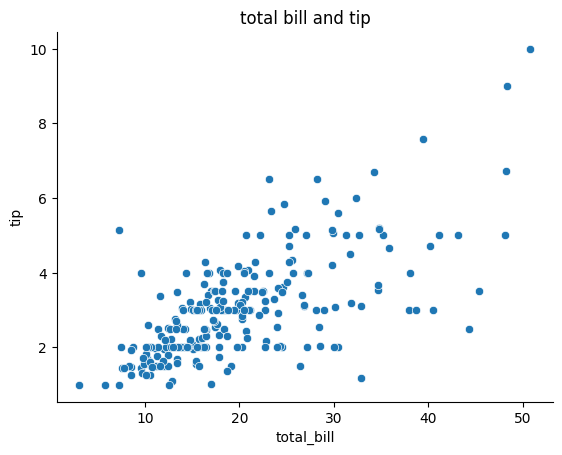

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

ax = sns.scatterplot(data = tips,
                x = 'total_bill',
                y = 'tip')
ax.set(title = 'total bill and tip', ylabel = 'tip', xlabel='total_bill')
sns.despine()

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene
import statsmodels.api as sm

tips = sns.load_dataset("tips")

X = tips['total_bill']
y = tips['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           6.69e-34
Time:                        06:11:37   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

### 결정계수

In [39]:
X = tips['total_bill']
y_pred = 0.1050 * X + 0.9203
SS_resid = sum( (y - y_pred)**2 )
SS_resid

252.78880587750018

In [40]:
import numpy as np
SS_tot = sum((y - np.mean(y))**2)
SS_tot

465.21247704918073

In [ ]:
R2 = 1 - (SS_resid / SS_tot)
R2

0.456616453021796

In [ ]:
r = X.corr(y)
r**2

0.4566165863516758

### 잔차의 정규성
- 귀무가설 : 주어진 데이터는 정규분포를 이룬다.
- 대립가설 : 주어진 데이터를 정규분포를 이루고 있지 않다.
- pvalue=2.17137985424342e-05 ==> 0.0000217
- 정규분포를 이루고 있지 않으니깐, 위에서 만든 회귀식은 사용불가
  + 다른 회귀방식으로 넘어가야 함

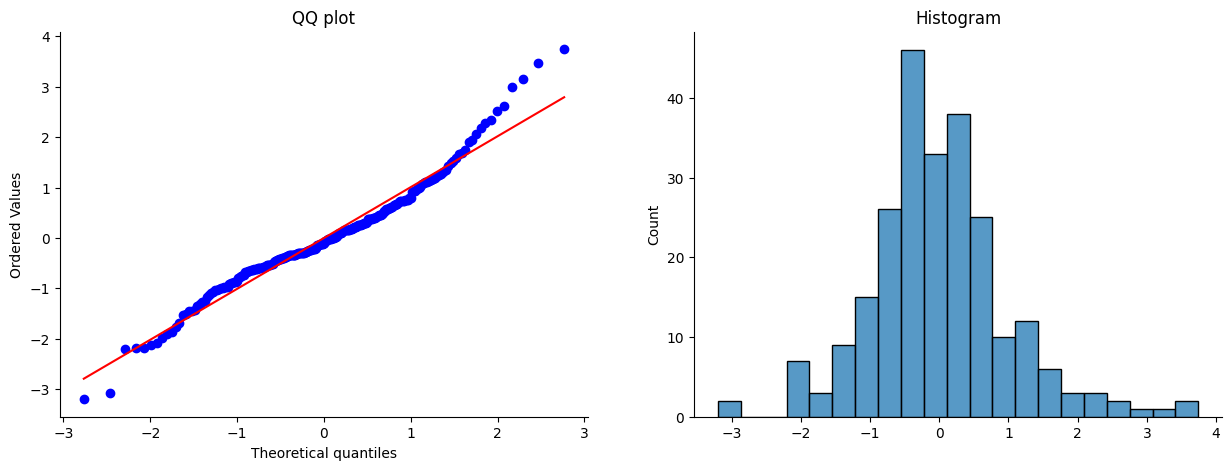

ShapiroResult(statistic=0.9672804064016668, pvalue=2.17137985424342e-05)

In [42]:
from scipy import stats
from scipy.stats import probplot

res = model.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(res, dist="norm", plot = axes[0]);
sns.histplot(res, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(res)

### 잔차의 등분산성
- 만약 이분산성이라면,
  + 종속 변수의 이상치 제거
  + 변수의 로그 변환

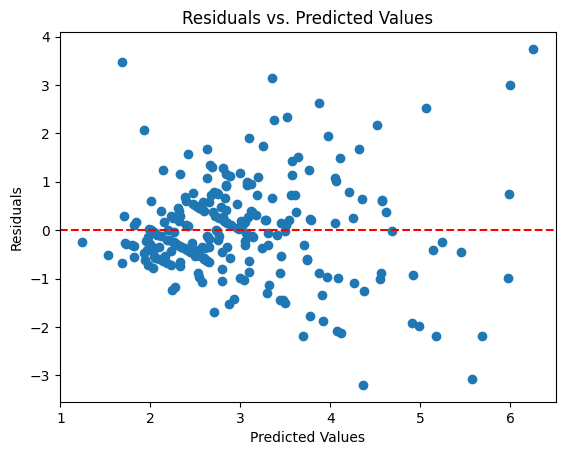

Levene’s Test p-value: 4.702940565257078e-06


[('Lagrange multiplier statistic', 59.94872593718973),
 ('p-value', 9.600626274967907e-14),
 ('f-value', 39.24896207437348),
 ('f p-value', 1.7565265345405124e-15)]

In [43]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

X = tips['total_bill']
y = tips['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optionally, use Levene's test to statistically test homoscedasticity
stat, p = levene(y, predictions)
print('Levene’s Test p-value:', p)

#The test
white_test = het_white(model.resid,  model.model.exog)

#Zipping the array with labels
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names,white_test)

- 로그변환

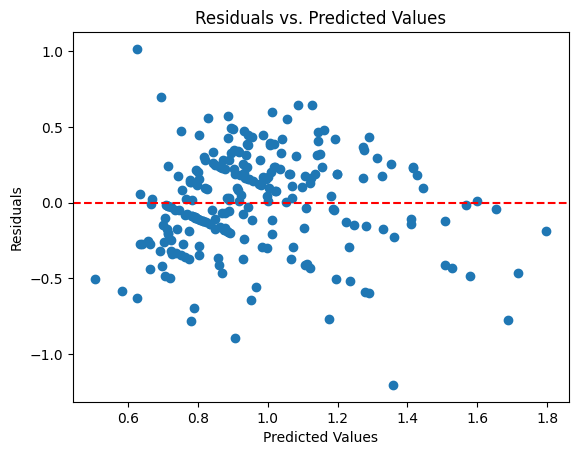

[('Lagrange multiplier statistic', 3.629199874311633),
 ('p-value', 0.16290306681983274),
 ('f-value', 1.8195346395978056),
 ('f p-value', 0.16440673241588843)]

In [49]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import numpy as np

Q1 = tips['tip'].quantile(0.25)
Q3 = tips['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_tips_sample = tips[(tips['tip'] >= lower_bound) & (tips['tip'] <= upper_bound)]

X = filtered_tips_sample['total_bill']
y = np.log(filtered_tips_sample['tip'])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

white_test = het_white(model.resid,  model.model.exog)
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names, white_test)

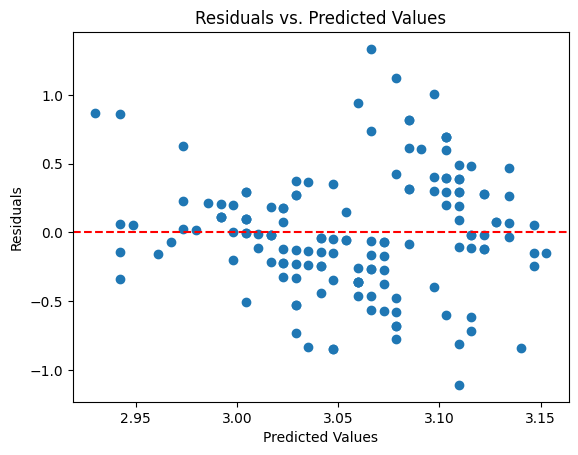

Levene’s Test p-value: 5.723499982592971e-28


[('Lagrange multiplier statistic', 2.9948817071581812),
 ('p-value', 0.22370191418827728),
 ('f-value', 1.4973887170215936),
 ('f p-value', 0.2271056648308649)]

In [50]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

iris = sns.load_dataset("iris")

X = iris['sepal_length']
y = iris['sepal_width']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optionally, use Levene's test to statistically test homoscedasticity
stat, p = levene(y, predictions)
print('Levene’s Test p-value:', p)

#The test
white_test = het_white(model.resid,  model.model.exog)

#Zipping the array with labels
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names,white_test)

## 다중선형회귀


### 수치형 데이터 위주

In [53]:
import seaborn as sns
import statsmodels.formula.api as smf

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
          # 종속변수     # 독립변수     독립변수
formula = "sepal_length ~ sepal_width + petal_length"
model = smf.ols(formula, data = iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     386.4
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           2.93e-59
Time:                        06:26:38   Log-Likelihood:                -46.513
No. Observations:                 150   AIC:                             99.03
Df Residuals:                     147   BIC:                             108.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2491      0.248      9.070   

### 범주형 데이터 포함

In [55]:
formula = "sepal_length ~ sepal_width + petal_length + species"
model = smf.ols(formula, data = iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     228.9
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.40e-61
Time:                        06:29:47   Log-Likelihood:                -34.787
No. Observations:                 150   AIC:                             79.57
Df Residuals:                     145   BIC:                             94.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.39

In [57]:
formula = "sepal_length ~ sepal_width + petal_length + C(species, Treatment(reference='virginica'))"
model = smf.ols(formula, data = iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     228.9
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.40e-61
Time:                        06:32:47   Log-Likelihood:                -34.787
No. Observations:                 150   AIC:                             79.57
Df Residuals:                     145   BIC:                             94.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

### 다중공선성 예시

In [58]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [59]:
import pandas as pd

boston = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2024/한국SW기술진흥협회/파이썬 기초통계 강의/data/boston.csv")
boston = boston.dropna(axis=0).reset_index(drop=True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [60]:
boston2 = boston.loc[:, ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'MEDV']]
boston2.head()

,CRIM,ZN,INDUS,NOX,RM,MEDV
0,0.00632,18.0,2.31,0.538,6.575,24.0
1,0.02731,0.0,7.07,0.469,6.421,21.6
2,0.02729,0.0,7.07,0.469,7.185,34.7
3,0.03237,0.0,2.18,0.458,6.998,33.4
4,0.02985,0.0,2.18,0.458,6.430,28.7


<Axes: >

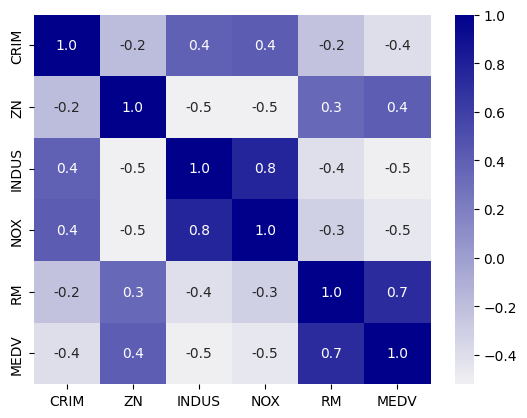

In [61]:
import seaborn as sns
cmap = sns.light_palette("darkblue", as_cmap=True)
sns.heatmap(boston2.corr(), annot=True, fmt='3.1f', cmap=cmap)

- 모델 결과를 보면, 다음과 같다.
  + [2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

In [62]:
import statsmodels.formula.api as smf

formula = "MEDV ~ " + "+".join(boston2.columns)
model = smf.ols(formula, data = boston2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.468e+31
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:38:31   Log-Likelihood:                 12105.
No. Observations:                 394   AIC:                        -2.420e+04
Df Residuals:                     387   BIC:                        -2.417e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.992e-15   7.14e-15      1.399      0.1

In [64]:
import statsmodels.formula.api as smf

formula = "MEDV ~ INDUS + NOX + RM"
model = smf.ols(formula, data = boston2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           2.23e-75
Time:                        06:40:16   Log-Likelihood:                -1254.3
No. Observations:                 394   AIC:                             2517.
Df Residuals:                     390   BIC:                             2533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.4423      3.610     -5.386      0.0

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = boston2.iloc[:, :-1]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values("VIF").reset_index(drop=True)

,feature,VIF
0,CRIM,1.442269
1,ZN,1.820784
2,INDUS,9.541660
3,RM,31.436022
4,NOX,50.167945


#### 다중공선성 해결방법
- 일부 수치 데이터에 정규화
- PCA와 같은 차원 축소 기법 사용 (대량의 수치데이터 필드가 존재할 때 종종 사용)
  * 독립변수의 개수를 줄이는데 목적이

In [66]:
import statsmodels.formula.api as smf
import numpy as np

formula = "MEDV ~ scale(CRIM) + scale(ZN) + scale(INDUS) + scale(RM) + scale(NOX)"
model = smf.ols(formula, data = boston2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     125.5
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           8.47e-79
Time:                        06:43:36   Log-Likelihood:                -1240.9
No. Observations:                 394   AIC:                             2494.
Df Residuals:                     388   BIC:                             2518.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.3596      0.287     78.036   